## Contents

### 1. Exporting visualizations
### 2. Data checks and preperation
  #### a. Check main dataframe
  #### b. Merging the dataframes
### 3. PII issues
### 4. Comparing geographic regions
### 5. Creating exclusion flags for low-activity customers
### 6. Creating customer profiles
  #### a. Age profiles
  #### b. Income profiles
  #### c. Number of dependants profile
  #### d. Baby items profile
  #### e. Pet profile
  #### f. Vegetarian profile
  #### g. Alcohol consumer profile aggregation
### 7. Aggregating the max, mean, and min variables on a customer-   profile level for usage frequency and expenditure
  #### a. Age profiles
  #### b. Income profiles
  #### c. Number of dependants profile
  #### d. Baby items profile
  #### e. Pet profile
  #### f. Vegetarian profile
  #### g. Alcohol consumer profile aggregation
### 8. Creating visualizations to show the distribution of profiles
  #### a. Age profiles
  #### b. Income profiles
  #### c. Number of dependants profile
  #### d. Baby items profile
  #### e. Pet profile
  #### f. Vegetarian profile
  #### g. Alcohol consumer profile aggregation
  ### 9. Exporting visualizations

# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Create project path
path = r'/Users/gwynreniers/Documents/Instacart Analysis'
path

'/Users/gwynreniers/Documents/Instacart Analysis'

In [3]:
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'full_instacart_data.pkl'))
df_departments=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','department_wrangled.csv'), index_col=False)

# 2. Data checks and preperation

### a. Checking the main dataframe

In [4]:
df.shape

(32404859, 34)

In [5]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Frequency_flag,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
#dropping column eval_set
df = df.drop(columns = ['eval_set'])

In [7]:
#rename no_of_dependant column for easier reading
df.rename(columns = {'no_of_dependants' : 'number_of_dependants'}, inplace = True)

In [158]:
#rename no_of_dependant column for easier reading
df.rename(columns = {'median_days_since_previous_order' : 'median_order_days'}, inplace = True)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32401975 entries, 0 to 32404857
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 object 
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   product_name            object 
 10  department_id           int8   
 11  prices                  float16
 12  price_range_loc         object 
 13  busiest_day             object 
 14  busiest_days            object 
 15  Busiest_period_of_day   object 
 16  max_order               int64  
 17  loyalty_flag            object 
 18  average_price           float16
 19  spending_flag           object 
 20  median_order_days       float64
 21  Frequency_flag          objec

## b. Checking the departments dataframe

In [9]:
df_departments.shape

(21, 2)

In [10]:
df_departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21 non-null     int64 
 1   department  21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [251]:
#Renaming the column
df_departments.rename(columns={'Unnamed: 0':'department_id'}, inplace=True)

In [252]:
df.rename(columns={'mean_price':'average_price'}, inplace=True)

In [14]:
#Data type correction for memory saving
df['order_id']=df['order_id'].astype('int32')
df_departments['department_id']=df_departments['department_id'].astype('int8')
df['department_id']=df['department_id'].astype('int8')
df['aisle_id']=df['aisle_id'].astype('int16')
df['average_price']=df['average_price'].astype('float16')
df['prices']=df['prices'].astype('float16')

In [15]:
#Deleting columns for memory saving
df=df.drop(columns=['_merge', 'aisle_id'])

### c. Merging the dataframes

In [253]:
%%time
df_merged=df.merge(df_departments, on='department_id')

CPU times: user 6.87 s, sys: 6.22 s, total: 13.1 s
Wall time: 15.7 s


In [254]:
df_merged.shape

(32401975, 33)

# 3. PII issues

In [255]:
#Checking column names in order to detect any PII data
df_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'department_id',
       'prices', 'price_range_loc', 'busiest_day', 'busiest_days',
       'Busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_order_days', 'Frequency_flag', 'first_name',
       'surname', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', 'activity_flag',
       'department'],
      dtype='object')

#### The columns 'first_name' and 'surname' should be removed as they contain PII.  Also removal of the column department_id would reduce memory issues as it is not necessary.

# 4. Comparing geographic regions

In [256]:
#Creating a list of regions from provided webpage
northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [257]:
#Creating regional flags
df_merged.loc[df_merged['state'].isin(northeast), 'region']='Northeast'
df_merged.loc[df_merged['state'].isin(midwest), 'region']='Midwest'
df_merged.loc[df_merged['state'].isin(south), 'region']='South'
df_merged.loc[df_merged['state'].isin(west), 'region']='West'

In [258]:
#check output
df_merged['region'].value_counts(dropna=False)

South        10790974
West          8292208
Midwest       7596724
Northeast     5722069
Name: region, dtype: int64

In [259]:
#Crosstab of region with spending flags
crosstab=pd.crosstab(df_merged['region'], df_merged['spending_flag'],  dropna=False)
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155970,7440754
Northeast,108224,5613845
South,209683,10581291
West,160338,8131870


In [260]:
#Number of states per region
df_merged.groupby('region')['state'].nunique()

region
Midwest      12
Northeast     9
South        17
West         13
Name: state, dtype: int64

In [261]:
#Unique customer numbers
unique_customers=df_merged.groupby('region').agg({'prices':['sum'],'user_id': 'nunique', 'average_price':'mean'})
unique_customers.columns=['total_price', 'customer_count', 'average_price']
unique_customers

,total_price,customer_count,average_price
region,,,
Midwest,NaN,48519,12.718750
Northeast,NaN,36388,11.554688
South,NaN,68737,12.195312
West,NaN,52565,11.320312


In [262]:
unique_customers.sort_values(by='customer_count', ascending=False)

,total_price,customer_count,average_price
region,,,
South,NaN,68737,12.195312
West,NaN,52565,11.320312
Midwest,NaN,48519,12.718750
Northeast,NaN,36388,11.554688


#### The south has a higher customer count with the second highest average price, and the West has the second highest customer count with the lowest average price. The midwest states spend the most per customer on average.

# 5.  Creating exclusion flag for low-activity customers.

In [263]:
df_merged['total_orders']=df_merged.groupby(['user_id']).user_id.transform('count')

In [264]:
#low activity customers have less than 5 orders
#creating exclusion flag by counting the amount of times user_id shows up in dataframe, less than 5 is low activity
results_2=[]
for total in df_merged['total_orders']:
    if total < 5:
        results_2.append('Low Activity')
    else:
        results_2.append('Regular Activity')

In [265]:
#including column in dataframe
df_merged['activity_flag']=results_2

In [266]:
#there are 2884 low activity customers
df_merged['activity_flag'].value_counts(dropna=False)

Regular Activity    32399093
Low Activity            2882
Name: activity_flag, dtype: int64

In [267]:
#creating subset of low activity customers
low_activity_customers= df_merged[df_merged['activity_flag']=='Low Activity']

In [268]:
low_activity_customers.shape

(2882, 35)

In [269]:
#exporting low activity subset
low_activity_customers.to_csv(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customers.csv'))

In [270]:
#excluding sample from dataset
df_merged.drop(df_merged[df_merged['activity_flag']=='Low Activity'].index, inplace=True)

In [271]:
df_merged['activity_flag'].value_counts()

Regular Activity    32399093
Name: activity_flag, dtype: int64

In [272]:
 #viewing dataset
pd.set_option('display.max_columns', None)
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_range_loc,busiest_day,busiest_days,Busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_order_days,Frequency_flag,first_name,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,7,9.0,Mid-range product,Regularly Busy,Regularly busy,Average orders,10,New customer,6.367188,Low spender,4.7,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Regular Activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,7,9.0,Mid-range product,Regularly Busy,Least busy,Average orders,10,New customer,6.367188,Low spender,4.7,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Regular Activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,7,9.0,Mid-range product,Regularly Busy,Least busy,Most orders,10,New customer,6.367188,Low spender,4.7,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Regular Activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367188,Low spender,4.7,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Regular Activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367188,Low spender,4.7,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Regular Activity


## Analysis continues on only active customers

# 6.  Creating customer profiles

## a. Age profile

In [273]:
#Creating age flags for young adult:18-35 years, middle-aged adult: 36-55 years, older adults:56+ years
df_merged.loc[df_merged['age']<=35, 'age_group']='Young Adult'
df_merged.loc[(df_merged['age']<=55)&(df_merged['age']>35), 'age_group']='Adult'
df_merged.loc[df_merged['age']>55, 'age_group']='Senior'
df_merged['age_group'].value_counts(dropna=False)

Senior         13089812
Adult          10164405
Young Adult     9144876
Name: age_group, dtype: int64

## b. Income profile

In [274]:
#Creating flags for income: <55,000- low income, 52,000<n<156,000-middle income, <156,000- high income
df_merged.loc[df_merged['income']<52000, 'income_group']='Low Income'
df_merged.loc[(df_merged['income']>=52000)&(df_merged['income']<156000), 'income_group']='Middle Income'
df_merged.loc[df_merged['income']>156000, 'income_group']='High Income'
df_merged['income_group'].value_counts(dropna=False)  
  

Middle Income    25569920
Low Income        3877946
High Income       2951227
Name: income_group, dtype: int64

## c. Number of Dependants Profile

In [275]:
#customers with 0 dependants are no dependants customers
df_merged.loc[df_merged['number_of_dependants']== 0, 'dependant_flag'] = 'No dependants'
#customers with more than 0 dependants are parents
df_merged.loc[df_merged['number_of_dependants'] > 0, 'dependant_flag'] = 'Parent'


In [276]:
df_merged['dependant_flag'].value_counts()

Parent           24303100
No dependants     8095993
Name: dependant_flag, dtype: int64

# d. Baby items profile

In [277]:
df_merged['department'].value_counts()

produce            9477983
dairy eggs         5397913
snacks             2887046
beverages          2687138
frozen             2234310
pantry             1875021
bakery             1172233
canned goods       1067940
deli               1051107
dry goods pasta     866527
household           738410
meat seafood        708803
breakfast           702916
personal care       447452
babies              423768
international       269220
alcohol             153622
pets                 97704
missing              69133
other                36281
bulk                 34566
Name: department, dtype: int64

In [278]:
#Creating flags for bought baby stuff(1)/didn't buy baby stuff (0). Binary values were used in order to save memory. 
df_merged['baby_status'] = [1 if x == 'babies' else 0 for x in df_merged['department']]
df_merged['baby_status']=df_merged.groupby(['user_id'])['baby_status'].transform(np.max)
df_merged['baby_status'].value_counts(dropna=False)

0    22426717
1     9972376
Name: baby_status, dtype: int64

In [279]:
#Reducing memory issues
df_merged['baby_status']=df_merged['baby_status'].astype('int8')

## e. Pet profile


In [280]:
#Creating flag for: has a pet(1)/doesn't have pets(0).
df_merged['pet_status']=[1 if x=='pets' else 0 for x in df_merged['department']]
df_merged['pet_status']=df_merged.groupby(['user_id'])['pet_status'].transform(np.max)
df_merged['pet_status'].value_counts(dropna=False)

0    28871445
1     3527648
Name: pet_status, dtype: int64

## f. Vegetarian profile

In [281]:
#Creating flag for: vegetarian(0)/not vegetarian(1).
df_merged['veggie_status']=[1 if (x=='meat seafood')or(x=='dairy eggs') else 0 for x in df_merged['department']]
df_merged['veggie_status']=df_merged.groupby(['user_id'])['veggie_status'].transform(np.max)
df_merged['veggie_status'].value_counts(dropna=False)

1    32017839
0      381254
Name: veggie_status, dtype: int64

#### Customers who don't purchase animal products may not be vegan/vegetarian, they may purchase elsewhere. Cannot be 100% certain but this will flag non- animal product or non-meat buying customers

In [282]:
#Reducing memory 
df_merged['veggie_status']=df_merged['veggie_status'].astype('int8')

## g. Alcohol consumer profile

In [283]:
#Creating a flag for: alcohol consumer(1)/not consumer(0).
df_merged['alcohol_status']=[1 if x=='alcohol' else 0 for x in df_merged['department']]
df_merged['alcohol_status']=df_merged.groupby(['user_id'])['alcohol_status'].transform(np.max)
df_merged['alcohol_status'].value_counts(dropna=False)

0    29985562
1     2413531
Name: alcohol_status, dtype: int64

In [284]:
#Reducing memory 
df_merged['alcohol_status']=df_merged['alcohol_status'].astype('int8')

In [285]:
#Exporting the dataframe
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers.pkl'))

In [286]:
#Renaming the column
df_merged.rename(columns={'median_days_since_previous_order':'median_order_days'}, inplace=True)

In [302]:
#Replacing inf with nan
df_merged.replace([np.inf -np.inf],np.nan, inplace= True)

In [304]:
df_merged['prices'] = np.clip(df_merged.prices.values, a_min=1, a_max=25)
df_merged

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_range_loc,busiest_day,busiest_days,Busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_order_days,Frequency_flag,first_name,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income,activity_flag,department,region,total_orders,age_group,income_group,dependant_flag,baby_status,pet_status,veggie_status,alcohol_status
0,2539329,1,1,2,8,NaN,196,1,0,Soda,7,9.000000,Mid-range product,Regularly Busy,Regularly busy,Average orders,10,New customer,6.367188,Low spender,4.7,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Regular Activity,beverages,South,59,Young Adult,Low Income,Parent,0,0,1,0
1,2398795,1,2,3,7,15.0,196,1,1,Soda,7,9.000000,Mid-range product,Regularly Busy,Least busy,Average orders,10,New customer,6.367188,Low spender,4.7,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Regular Activity,beverages,South,59,Young Adult,Low Income,Parent,0,0,1,0
2,473747,1,3,3,12,21.0,196,1,1,Soda,7,9.000000,Mid-range product,Regularly Busy,Least busy,Most orders,10,New customer,6.367188,Low spender,4.7,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Regular Activity,beverages,South,59,Young Adult,Low Income,Parent,0,0,1,0
3,2254736,1,4,4,7,29.0,196,1,1,Soda,7,9.000000,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367188,Low spender,4.7,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Regular Activity,beverages,South,59,Young Adult,Low Income,Parent,0,0,1,0
4,431534,1,5,4,15,28.0,196,1,1,Soda,7,9.000000,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367188,Low spender,4.7,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Regular Activity,beverages,South,59,Young Adult,Low Income,Parent,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32401968,1605789,58201,28,5,7,27.0,5161,1,1,Dried Mango,10,6.101562,Mid-range product,Regularly Busy,Regularly busy,Average orders,28,Regular customer,7.691406,Low spender,5.8,Frequent customer,Todd,Khan,Male,Florida,75,2/8/2019,2,married,138066,Regular Activity,bulk,South,38,Senior,Middle Income,Parent,0,0,1,0
32401969,174466,195180,2,2,10,18.0,1000,1,0,Apricots,10,12.898438,Mid-range product,Regularly Busy,Regularly busy,Most orders,3,New customer,7.921875,Low spender,7.9,Frequent customer,Patrick,Henry,Male,Arizona,20,2/20/2017,3,living with parents and siblings,60256,Regular Activity,bulk,West,5,Young Adult,Middle Income,Parent,0,0,0,0
32401971,1565024,152886,2,1,9,30.0,1000,3,0,Apricots,10,12.898438,Mid-range product,Regularly Busy,Busiest Day,Most orders,13,Regular customer,6.812500,Low spender,5.1,Frequent customer,Gregory,Richard,Male,Pennsylvania,45,7/9/2017,1,married,41662,Regular Activity,bulk,Northeast,27,Adult,Low Income,Parent,0,0,1,0
32401972,2288597,87619,3,3,11,23.0,5161,2,0,Dried Mango,10,6.101562,Mid-range product,Regularly Busy,Least busy,Most orders,4,New customer,7.781250,Low spender,8.2,Frequent customer,Lawrence,Barry,Male,Alabama,47,2/17/2017,2,married,89341,Regular Activity,bulk,South,5,Adult,Middle Income,Parent,0,0,0,0


# 07. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

## a. Age profile aggregation

In [305]:
df_merged.groupby('age_group').agg({'prices':['mean', 'min', 'max']}) 

prices           
                 mean  min   max
age_group                       
Adult        7.792969  1.0  25.0
Senior       7.796875  1.0  25.0
Young Adult  7.789062  1.0  25.0

In [306]:
##aggregating for age group expenditure
df_merged.groupby('age_group').agg({'median_order_days':['mean', 'min', 'max']})

median_order_days           
                         mean  min   max
age_group                               
Adult                7.460096  1.0  25.0
Senior               7.466432  1.0  23.8
Young Adult          7.452556  1.0  21.3

## b. Income profile aggregation

In [215]:
df_merged['income_group'].value_counts()

Middle Income    25571525
Low Income        3879089
High Income       2951361
Name: income_group, dtype: int64

In [229]:
#aggregating for income bracket expenditure
df_merged.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
income_group                      
High Income    7.964673  1.0  25.0
Low Income     6.741055  1.0  25.0
Middle Income  7.933520  1.0  25.0

In [99]:
df_merged.groupby('income_group').agg({'median_order_days': ['mean', 'min', 'max']})

median_order_days           
                           mean  min   max
income_group                              
High Income            7.659638  2.2  25.0
Low Income             6.131468  1.0  14.2
Middle Income          7.639107  1.0  23.2

## c. Number of dependants profile aggregation

In [230]:
df_merged['dependant_flag'].value_counts()

Parent           24305228
No dependants     8096747
Name: dependant_flag, dtype: int64

In [231]:
df_merged.groupby('dependant_flag').agg({'prices':['mean', 'min', 'max']})

prices           
                    mean  min   max
dependant_flag                     
No dependants   7.792449  1.0  25.0
Parent          7.793981  1.0  25.0

In [232]:
df_merged.groupby('dependant_flag').agg({'median_order_days':['mean', 'min', 'max']})

median_order_days           
                            mean  min   max
dependant_flag                             
No dependants           7.463585  1.0  23.8
Parent                  7.459478  1.0  25.0

## d. Baby item profile aggregation

In [233]:
df_merged['baby_status'] = [1 if x == 'babies' else 0 for x in df_merged['department']]
df_merged['baby_status']=df_merged.groupby(['user_id'])['baby_status'].transform(np.max)
df_merged['baby_status'].value_counts(dropna=False)

0    22429577
1     9972398
Name: baby_status, dtype: int64

In [234]:
#Reducing memory 
df_active['baby_status']=df_active['baby_status'].astype('int8')

In [235]:
# 0 = didnt purchase baby items. 1 = purchased baby items
df_merged.groupby('baby_status').agg({'median_order_days':['mean', 'min', 'max']}) 

median_order_days           
                         mean  min   max
baby_status                             
0                    7.439545  1.0  25.0
1                    7.507644  1.4  18.2

In [236]:
df_merged.groupby('baby_status').agg({'prices':['mean', 'min', 'max']}) 

prices           
                 mean  min   max
baby_status                     
0            7.775238  1.0  25.0
1            7.834893  1.0  25.0

## e. Pet Profile aggregation

In [314]:
df_merged['pet_status'].value_counts()

0    28871445
1     3527648
Name: pet_status, dtype: int64

In [312]:
df_pet=df_merged.groupby(['pet_status']).agg({'median_order_days':['mean', 'min', 'max']})
df_pet.loc[0:1,'pet_status']=['never purchased pet items', 'purchased pet items']
df_pet

median_order_days                            pet_status
                        mean  min   max                           
pet_status                                                        
0                   7.461694  1.0  25.0  never purchased pet items
1                   7.450979  1.7  13.9        purchased pet items

In [313]:
df_pet=df_merged.groupby(['pet_status']).agg({'prices':['mean', 'min', 'max']})
df_pet.loc[0:1,'pet_status']=['never purchased pet items', 'purchased pet items']
df_pet

prices                            pet_status
                mean  min   max                           
pet_status                                                
0           7.789062  1.0  25.0  never purchased pet items
1           7.816406  1.0  25.0        purchased pet items

## f. Vegetarian Profile aggregation

In [315]:
df_merged['veggie_status'].value_counts()

1    32017839
0      381254
Name: veggie_status, dtype: int64

In [239]:
#Aggregating the max, mean, and min variables on income-profile level for usage frequency and expenditure.
df_veggie=df_merged.groupby(['veggie_status']).agg({'median_order_days':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})
df_veggie.loc[0:1,'veggie_status']=['vegetarian', ' not vegetarian']
df_veggie

median_order_days               prices             \
                           mean  min   max      mean  min   max   
veggie_status                                                     
0                       6.75932  1.0  15.0  7.009687  1.0  20.0   
1                       7.46890  1.0  25.0  7.802985  1.0  25.0   

                 veggie_status  
                                
veggie_status                   
0                   vegetarian  
1               not vegetarian

## g. Alcohol drinker Profile aggregation

In [316]:
df_merged['alcohol_status'].value_counts()

0    29985562
1     2413531
Name: alcohol_status, dtype: int64

In [319]:
df_alcohol=df_merged.groupby('alcohol_status').agg({'median_order_days':['mean', 'min', 'max']})
df_alcohol.loc[0:1,'alcohol_status']=['not alcohol drinker', 'alcohol drinker']
df_alcohol

median_order_days                  alcohol_status
                            mean  min   max                     
alcohol_status                                                  
0                       7.462034  1.0  25.0  not alcohol drinker
1                       7.441809  1.3  14.7      alcohol drinker

In [320]:
df_alcohol=df_merged.groupby('alcohol_status').agg({'prices':['mean', 'min', 'max']})
df_alcohol.loc[0:1,'alcohol_status']=['not alcohol drinker', 'alcohol drinker']
df_alcohol

prices                  alcohol_status
                    mean  min   max                     
alcohol_status                                          
0               7.792969  1.0  25.0  not alcohol drinker
1               7.792969  1.0  25.0      alcohol drinker

# 08. Creating visualizations to show the distribution of profiles

In [326]:
#Creating a subset with unique customers
df_unique=df_merged.drop_duplicates(subset='user_id')

In [327]:
df_unique.shape

(205410, 42)

Text(0, 0.5, 'number of customers')

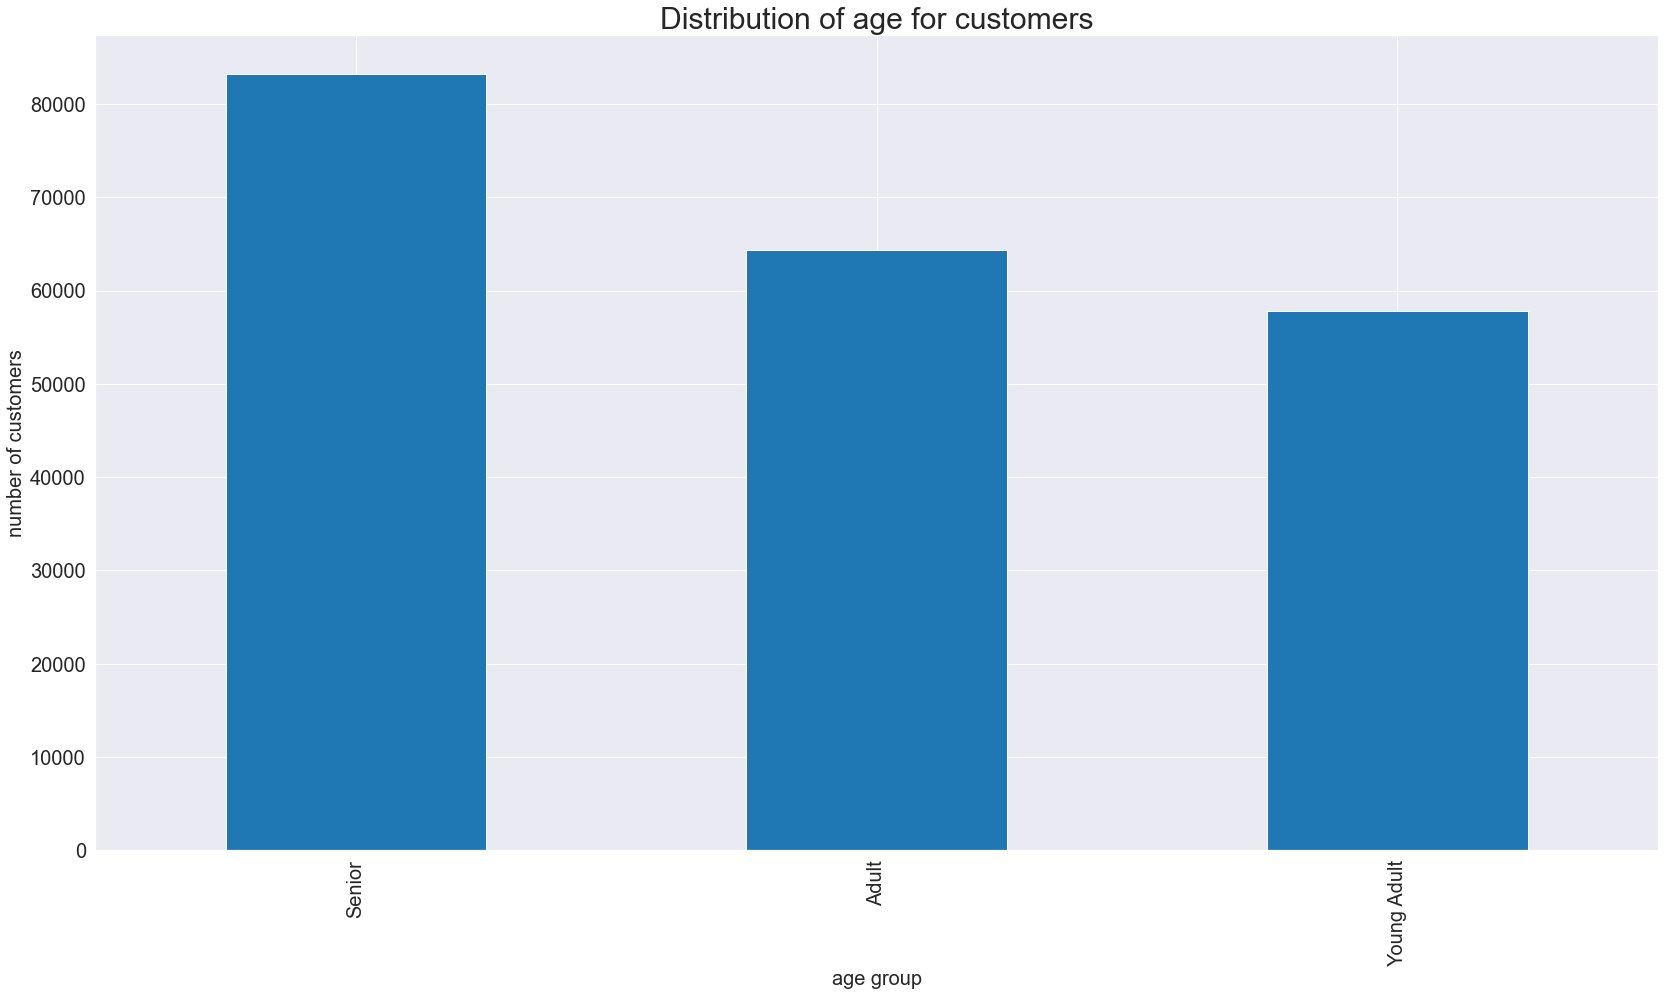

In [329]:
#Setting script figure size to 28,15
sns.set(rc = {'figure.figsize':(28,15)})
#Creating a bar chart for age distribution of customers
bar=df_unique['age_group'].value_counts().plot.bar(color='#1f77b4', fontsize=20)
plt.title('Distribution of age for customers', fontsize=30)
plt.xlabel('age group', fontsize=20)
plt.ylabel('number of customers', fontsize=20)

## b. Income Profile distribution

Text(0, 0.5, 'number of customers')

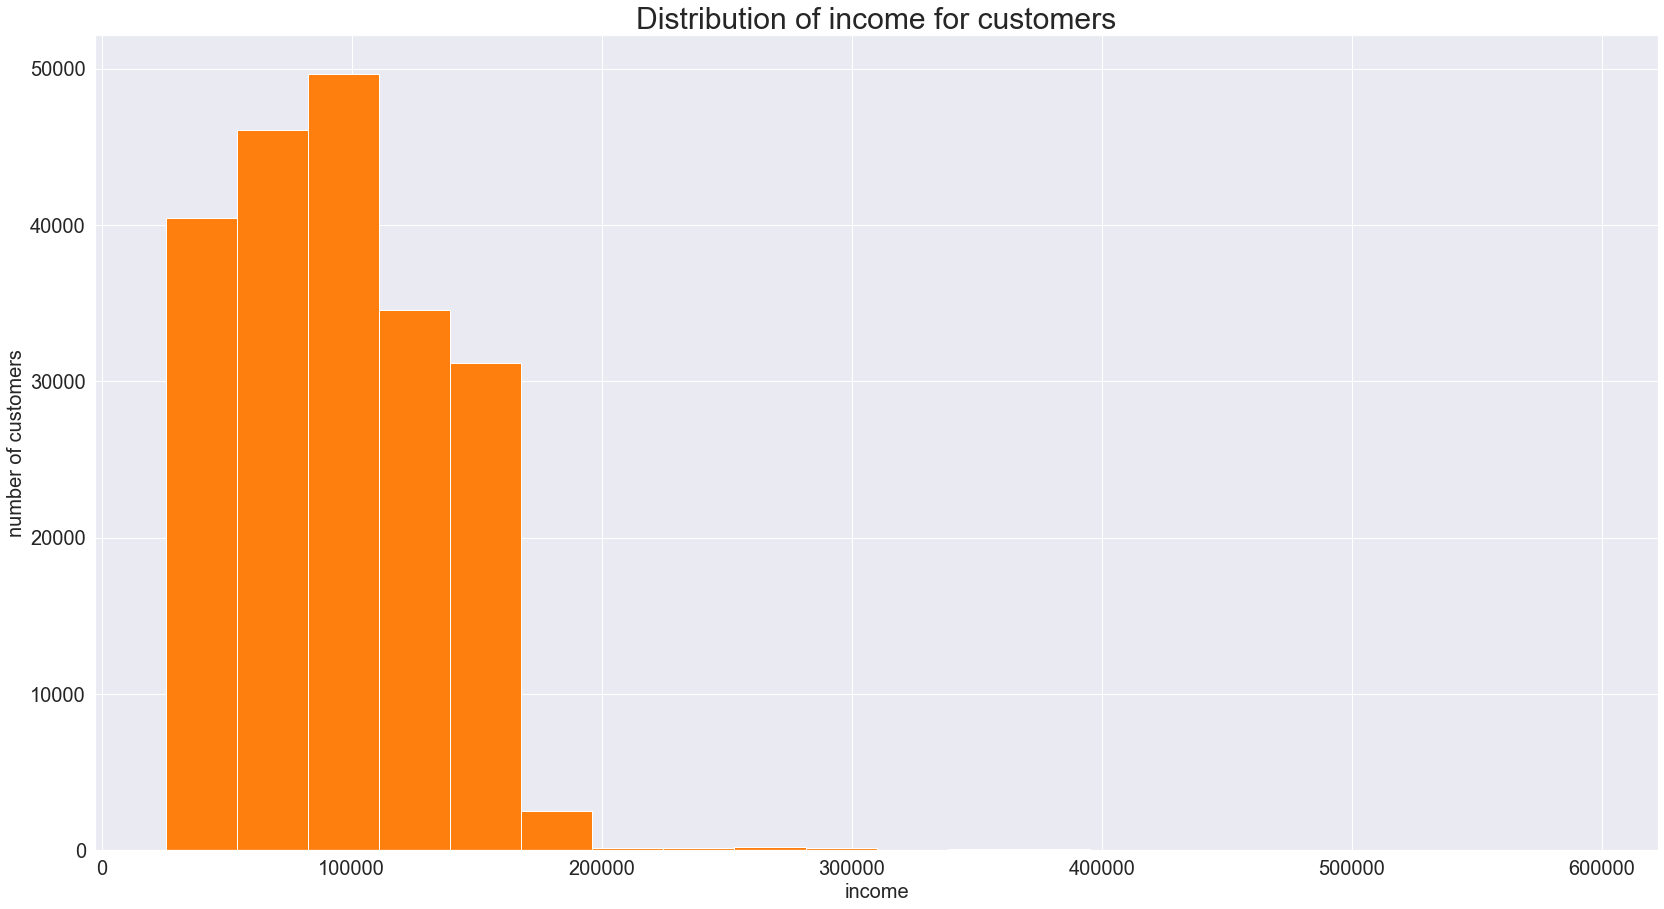

In [332]:
#Histogram customer income profile
hist=df_unique['income'].plot.hist(bins=20, color='#ff7f0e', fontsize=20)
plt.title('Distribution of income for customers', fontsize=30)
plt.xlabel('income', fontsize=20)
plt.ylabel('number of customers', fontsize=20)

## c. Number of dependants Profile distribution

In [336]:
#Creating a crosstab for dependants and family status
dependant=pd.crosstab(df_unique['dependant_flag'], df_unique['dependant_flag'])
dependant

dependant_flag,No dependants,Parent
dependant_flag,,
No dependants,51394,0
Parent,0,154016


In [346]:
#Creating a crosstab for dependants and family status
dependant=pd.crosstab(df_unique['marital_status'], df_unique['dependant_flag'])
dependant

dependant_flag,No dependants,Parent
marital_status,,
divorced/widowed,17569,0
living with parents and siblings,0,9665
married,0,144351
single,33825,0


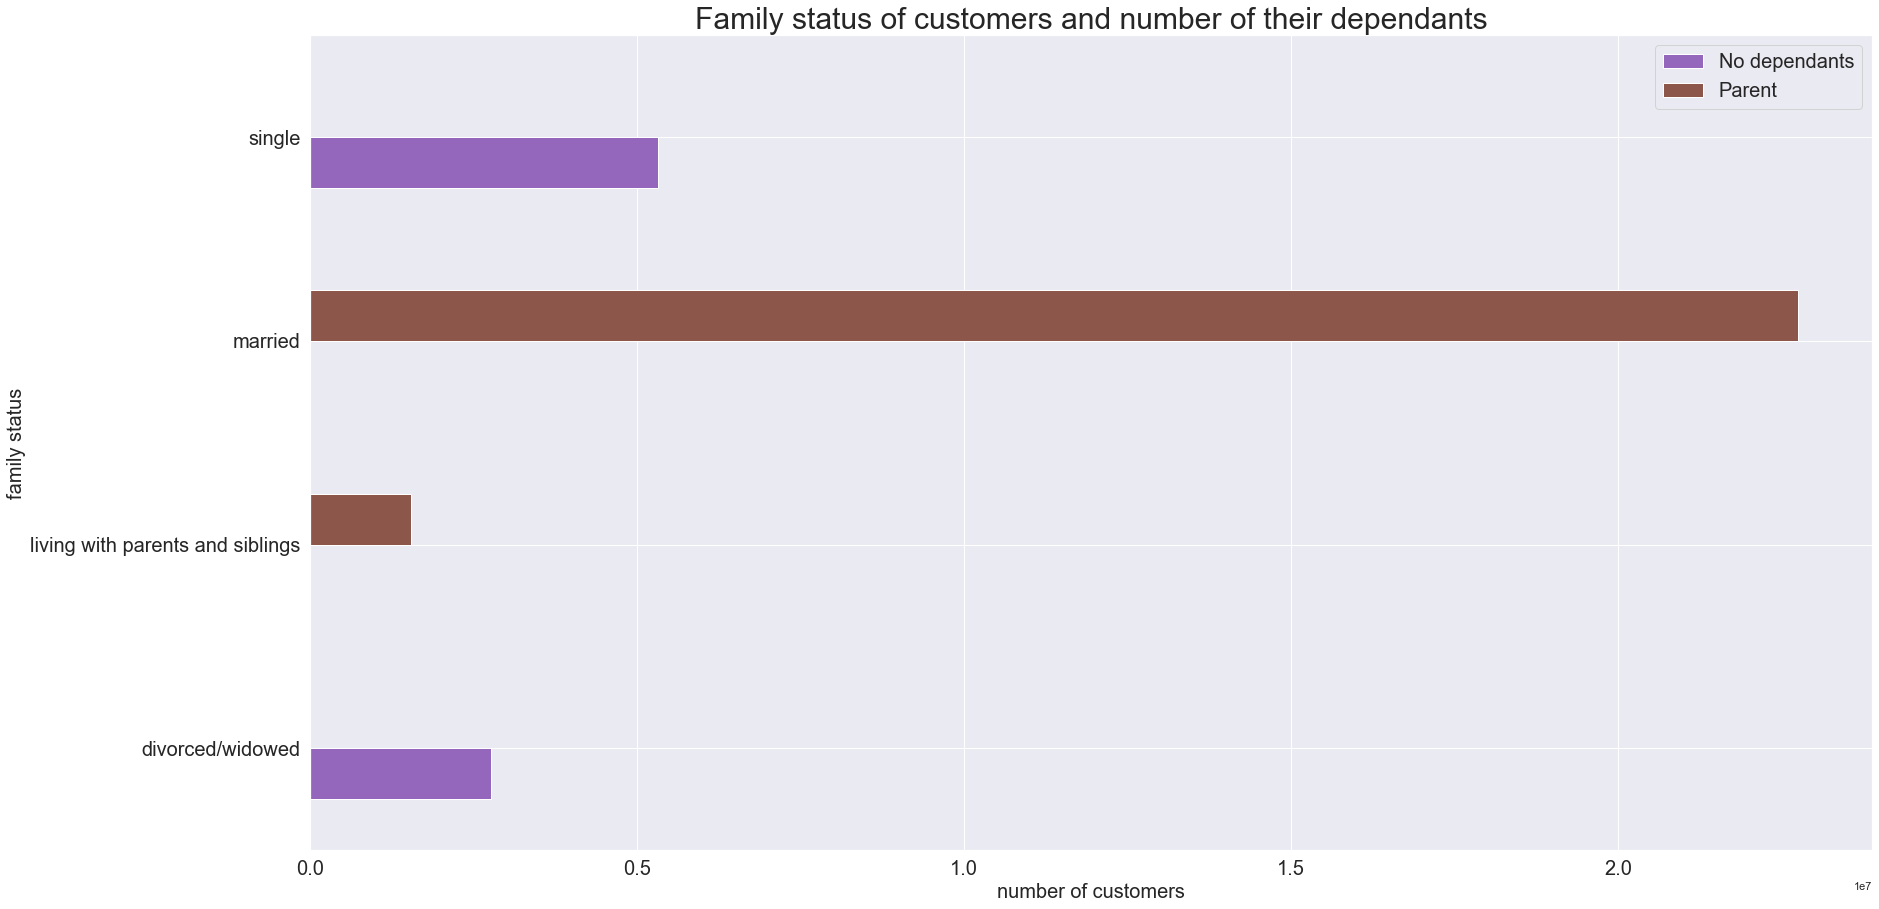

In [342]:
#Creating a bar chart for number of dependants
bar2=dependant.plot.barh(color=['#9467bd', '#8c564b'], fontsize=20)
plt.title('Family status of customers and number of their dependants', fontsize=30)
plt.xlabel('number of customers', fontsize=20)
plt.ylabel('family status', fontsize=20)
plt.legend(fontsize=20)

## d. Baby item profile distribution

In [347]:
#Creating a pie chart
pd.crosstab(df_unique['marital_status'], df_unique['baby_status'])

baby_status,0,1
marital_status,,
divorced/widowed,14669,2900
living with parents and siblings,8085,1580
married,120628,23723
single,28304,5521


In [348]:
df_unique['baby_status'].value_counts()

0    171686
1     33724
Name: baby_status, dtype: int64

<AxesSubplot:>

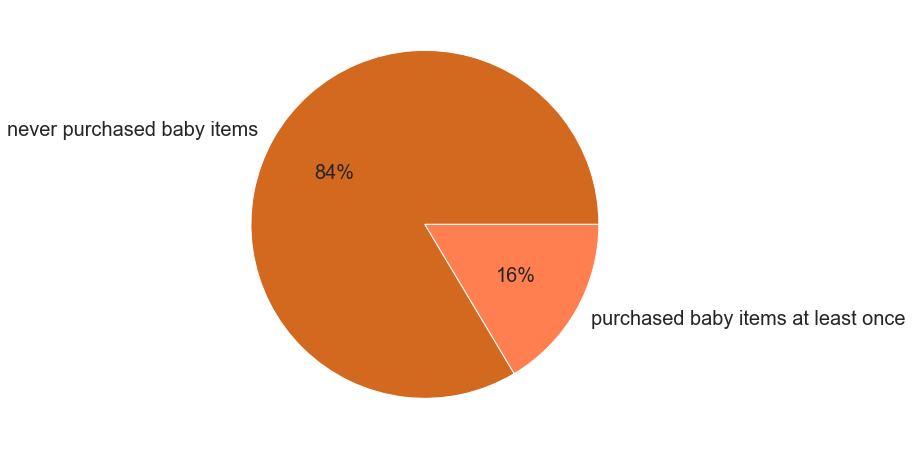

In [349]:
sns.set(rc = {'figure.figsize':(18,8)})
#Pie chart of customers who have purchased baby items at least once
baby_items=df_unique['baby_status'].value_counts()
pie=baby_items.plot.pie(label='', labels=['never purchased baby items', 'purchased baby items at least once'],autopct=('%1.f%%'), colors=['#D2691E','#FF7F50'], textprops={'fontsize': 20})
pie

## e. Pet Profile distribution

In [350]:
df_unique['pet_status'].value_counts()

0    190428
1     14982
Name: pet_status, dtype: int64

<AxesSubplot:>

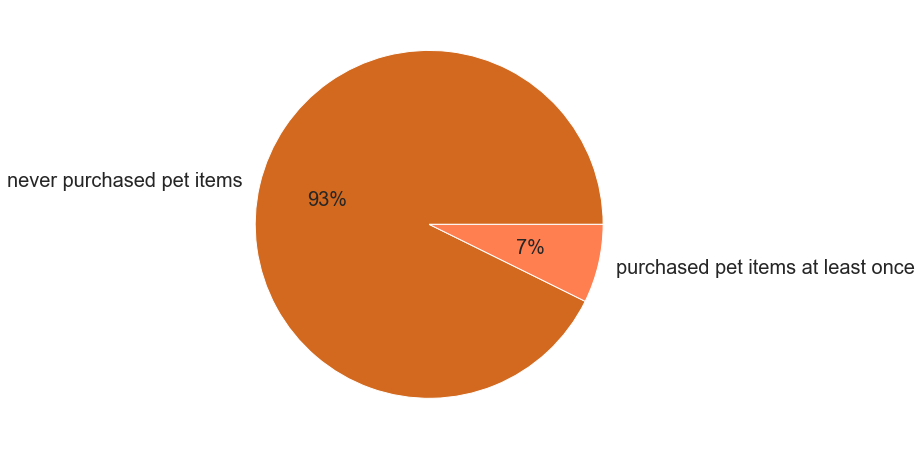

In [351]:
sns.set(rc = {'figure.figsize':(18,8)})
#Pie chart of customers who have purchased pet items at least once
pet_items=df_unique['pet_status'].value_counts()
pie=pet_items.plot.pie(label='', labels=['never purchased pet items', 'purchased pet items at least once'],autopct=('%1.f%%'), colors=['#D2691E','#FF7F50'], textprops={'fontsize': 20})
pie

## f. Vegetarian profile distribution

In [353]:
df_unique['veggie_status'].value_counts()

1    192760
0     12650
Name: veggie_status, dtype: int64

<AxesSubplot:>

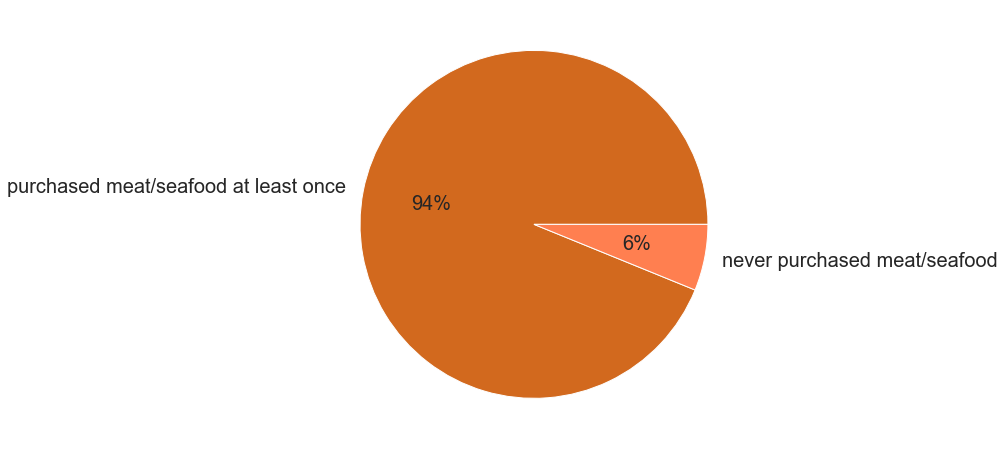

In [355]:
#Creating a pie chart for customers who have bought meat least once
veggie=df_unique['veggie_status'].value_counts()
pie3=veggie.plot.pie(label='',labels=['purchased meat/seafood at least once', 'never purchased meat/seafood'],autopct=('%1.f%%'), colors=['#D2691E','#FF7F50'], textprops={'fontsize': 20})
pie

## g. Alcohol consumer profile distribution

<AxesSubplot:>

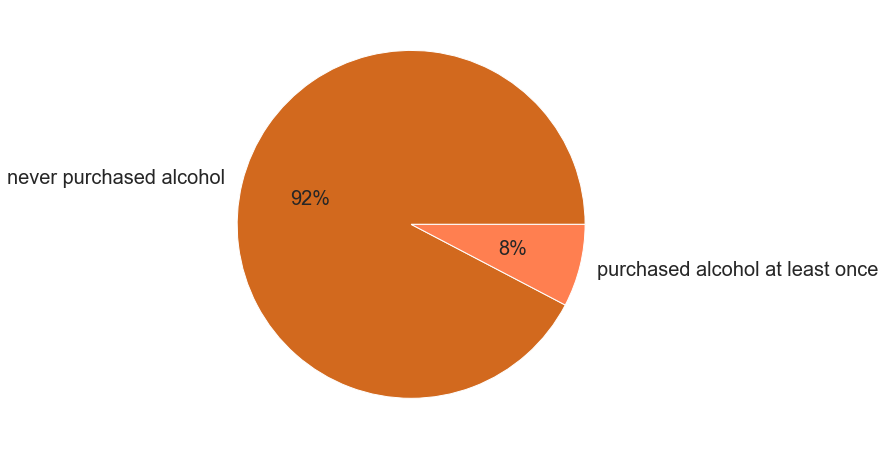

In [356]:
#Creating a pie chart for customers who purchased alcohol at least once
alcohol=df_unique['alcohol_status'].value_counts()
pie4=alcohol.plot.pie(label='', labels=['never purchased alcohol', 'purchased alcohol at least once'],autopct=('%1.f%%'), colors=['#D2691E','#FF7F50'], textprops={'fontsize': 20})
pie

# 9. Exporting visualizations

In [357]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group.png'))
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_income_distribution.png'))
bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependants.png'))